In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

**Importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import array as arr
import pickle


## **Step 1 : Data Collection**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/shivanithorve01/ML-Project/main/Dataset/Crop_recommendation.csv', error_bad_lines=False)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## **Step 2 : Data Exploration and Data Pre-processing**

**Finding inforation about the data such as :** \
1. No of Columns.
2. No of Rows.
3. No of non-null values out of total values.
4. Type of Data



In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [7]:
len(df)

2200

In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**Describing the data** 




In [9]:
#Statistical overview of the data
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**Finding total categories present in the label** \
To find how many types of crops are present in the dataset

In [10]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

**Finding total no. of categories in the label**

In [11]:
df["label"].value_counts().count()

22

In [12]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
#if rows are duplicated or not
df.duplicated().sum()

0

## **Step 3 : Data Transformation**

#### **Feature Encoding**

In [14]:
type("label")

str

As we have string type of data in the target variable, we need to transform it into numerical format \

In [15]:


from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df["label"])
 
# printing label
label

array([20, 20, 20, ...,  5,  5,  5])

In [16]:
x = df.loc[:,['N','P','K','temperature','humidity','ph','rainfall']]
y = df.loc[:,'label']

## **Step 4 : Data Visualization**

***Count Plot***

Text(0.5, 1.0, 'Count of labels')

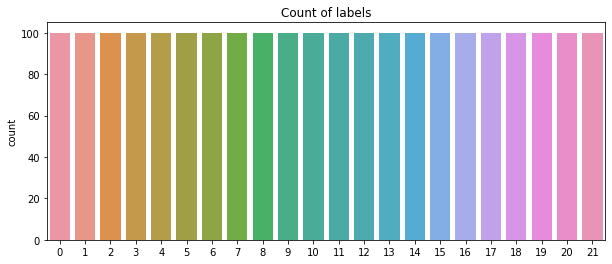

In [17]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
plt.figure(figsize = (10,4))
sns.countplot(x = label, data = df)
plt.title("Count of labels")

The countplot shows that each categorical variable have 100 samples in it indicating that there are 100 observations, each for all 22 crops in the dataset

**Distplot**

Text(0.5, 0.98, 'Frequency Distributions')

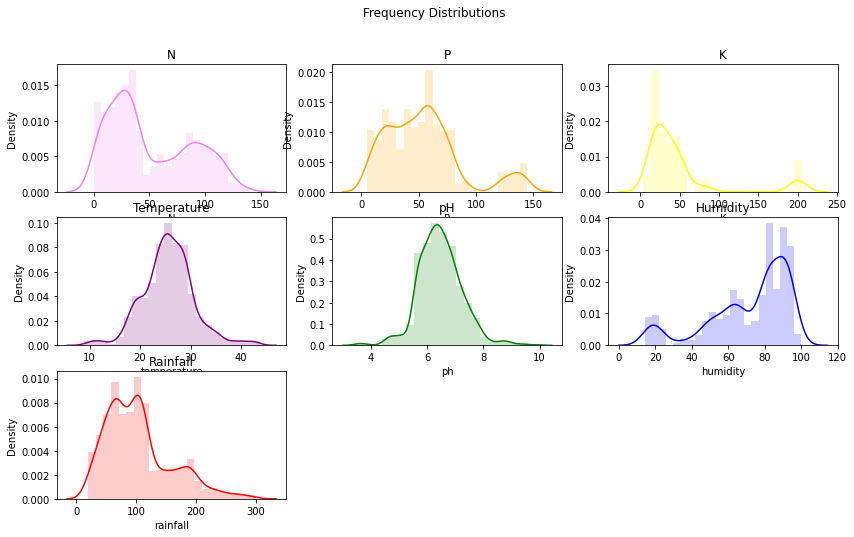

In [18]:
plt.figure(figsize=(14,8))
plt.subplot(3, 3, 1)
plt.title("N")
sns.distplot(df['N'],color="violet",bins=22,hist_kws={'alpha':0.2})
plt.subplot(3, 3, 2)
plt.title("P")
sns.distplot(df['P'],color="orange",bins=22,hist_kws={'alpha':0.2})
plt.subplot(3, 3, 3)
plt.title("K")
sns.distplot(df['K'],color="yellow",bins=22,hist_kws={'alpha':0.2})

plt.subplot(3, 3, 4)
plt.title("Temperature")
#the figure has 2 rows, 2 columns, and this plot is the first plot.
sns.distplot(df['temperature'],color="purple",bins=22,hist_kws={'alpha':0.2})
plt.subplot(3, 3, 5)
plt.title("pH")
sns.distplot(df['ph'],color="green",bins=22,hist_kws={'alpha':0.2})
plt.subplot(3, 3, 6)
plt.title("Humidity")
sns.distplot(df['humidity'],color="blue",bins=22,hist_kws={'alpha':0.2})
plt.subplot(3, 3, 7)
plt.title("Rainfall")
sns.distplot(df['rainfall'],color="red",bins=22,hist_kws={'alpha':0.2})

plt.suptitle("Frequency Distributions")

Here from these plots we can see that - \

*   Temperature and pH have Guassian(Normal) distributions that resemble each other.
*   Potassium values usually does not contain values between 100 to 180

**FUNNEL PLOT**\
Funnel plot is best used to describe progress at different stages of process

In [19]:
import plotly.express as px
fig = px.funnel(df, x='N', y='label')
fig.show()
fig = px.funnel(df, x='P', y='label')
fig.show()
fig = px.funnel(df, x='K', y='label')
fig.show()
fig = px.funnel(df, x='temperature', y='label')
fig.show()
fig = px.funnel(df, x='humidity', y='label')
fig.show()
fig = px.funnel(df, x='ph', y='label')
fig.show()
fig = px.funnel(df, x='rainfall', y='label')
fig.show()

Funnel charts are mostly used for representing a sequential process, allowing us to compare and see how the numbers change through the labels.



**Feature to feature correlation**

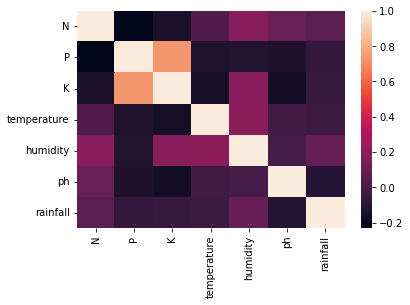

In [20]:
sns.heatmap(x.corr())

Heatmap is often used to find correlation between the features. \
Here, we can see that Phosphorus and Potassium are highly correlated. \
So before proceeding further for feeding data to model we should scale the features.

**Feature Scaling** \

As we have seen earlier that Phosphorus (P) and Potassium (K) are highly correlated and both follow Guassian distribution. So we will use normalization method for feature scaling.

### **Data Normalization**

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

## **Step 6 : Data Partitioning**

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3 ,random_state = 42)

## **Step 7 : Building the Model**

---



### **Naive Bayes Algorithm**

In [23]:
classifier_nb= GaussianNB ()

#FIT GAUSSIAN MODEL
classifier_nb.fit(x_train, y_train)
GaussianNB()

#PREDICT OUTPUT FOR TEST DATA BY MODEL
y_pred_nb = classifier_nb.predict(x_test)

#ACCURACY OF THE BUILT MODEL
acc_nb = metrics.accuracy_score(y_test, y_pred_nb)*100
print("Accuracy for Naive Bayes Model is : ", acc_nb)


print(classification_report(y_test, y_pred_nb))

Accuracy for Naive Bayes Model is :  99.39393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.89      1.00      0.94        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00   

In [24]:
from sklearn.model_selection import cross_val_score
CrossScore_nb = cross_val_score(classifier_nb,x,y,cv=5)
print('Cross validation score: ',CrossScore_nb*100)

Cross validation score:  [99.77272727 99.54545455 99.54545455 99.54545455 99.09090909]


In [25]:
from sklearn.metrics import f1_score

f1_nb = f1_score(y_test, y_pred_nb,average='micro')*100

print("F1 score for Naive Bayes is ",f1_nb)

F1 score for Naive Bayes is  99.39393939393939


### **Decision Tree**

In [26]:
classifier_dt = DecisionTreeClassifier(random_state = 42)
classifier_dt = classifier_dt.fit(x_train,y_train)

#PREDICT OUTPUT FOR TEST DATA BY MODEL
y_pred_dt = classifier_dt.predict(x_test)

acc_dt = metrics.accuracy_score(y_test, y_pred_dt)*100
print("Accuracy for Decision Tree Model is : ", acc_dt)

print(classification_report(y_test, y_pred_dt))

Accuracy for Decision Tree Model is :  98.63636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.86      0.94      0.90        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.94      0.97        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00 

In [27]:
! pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


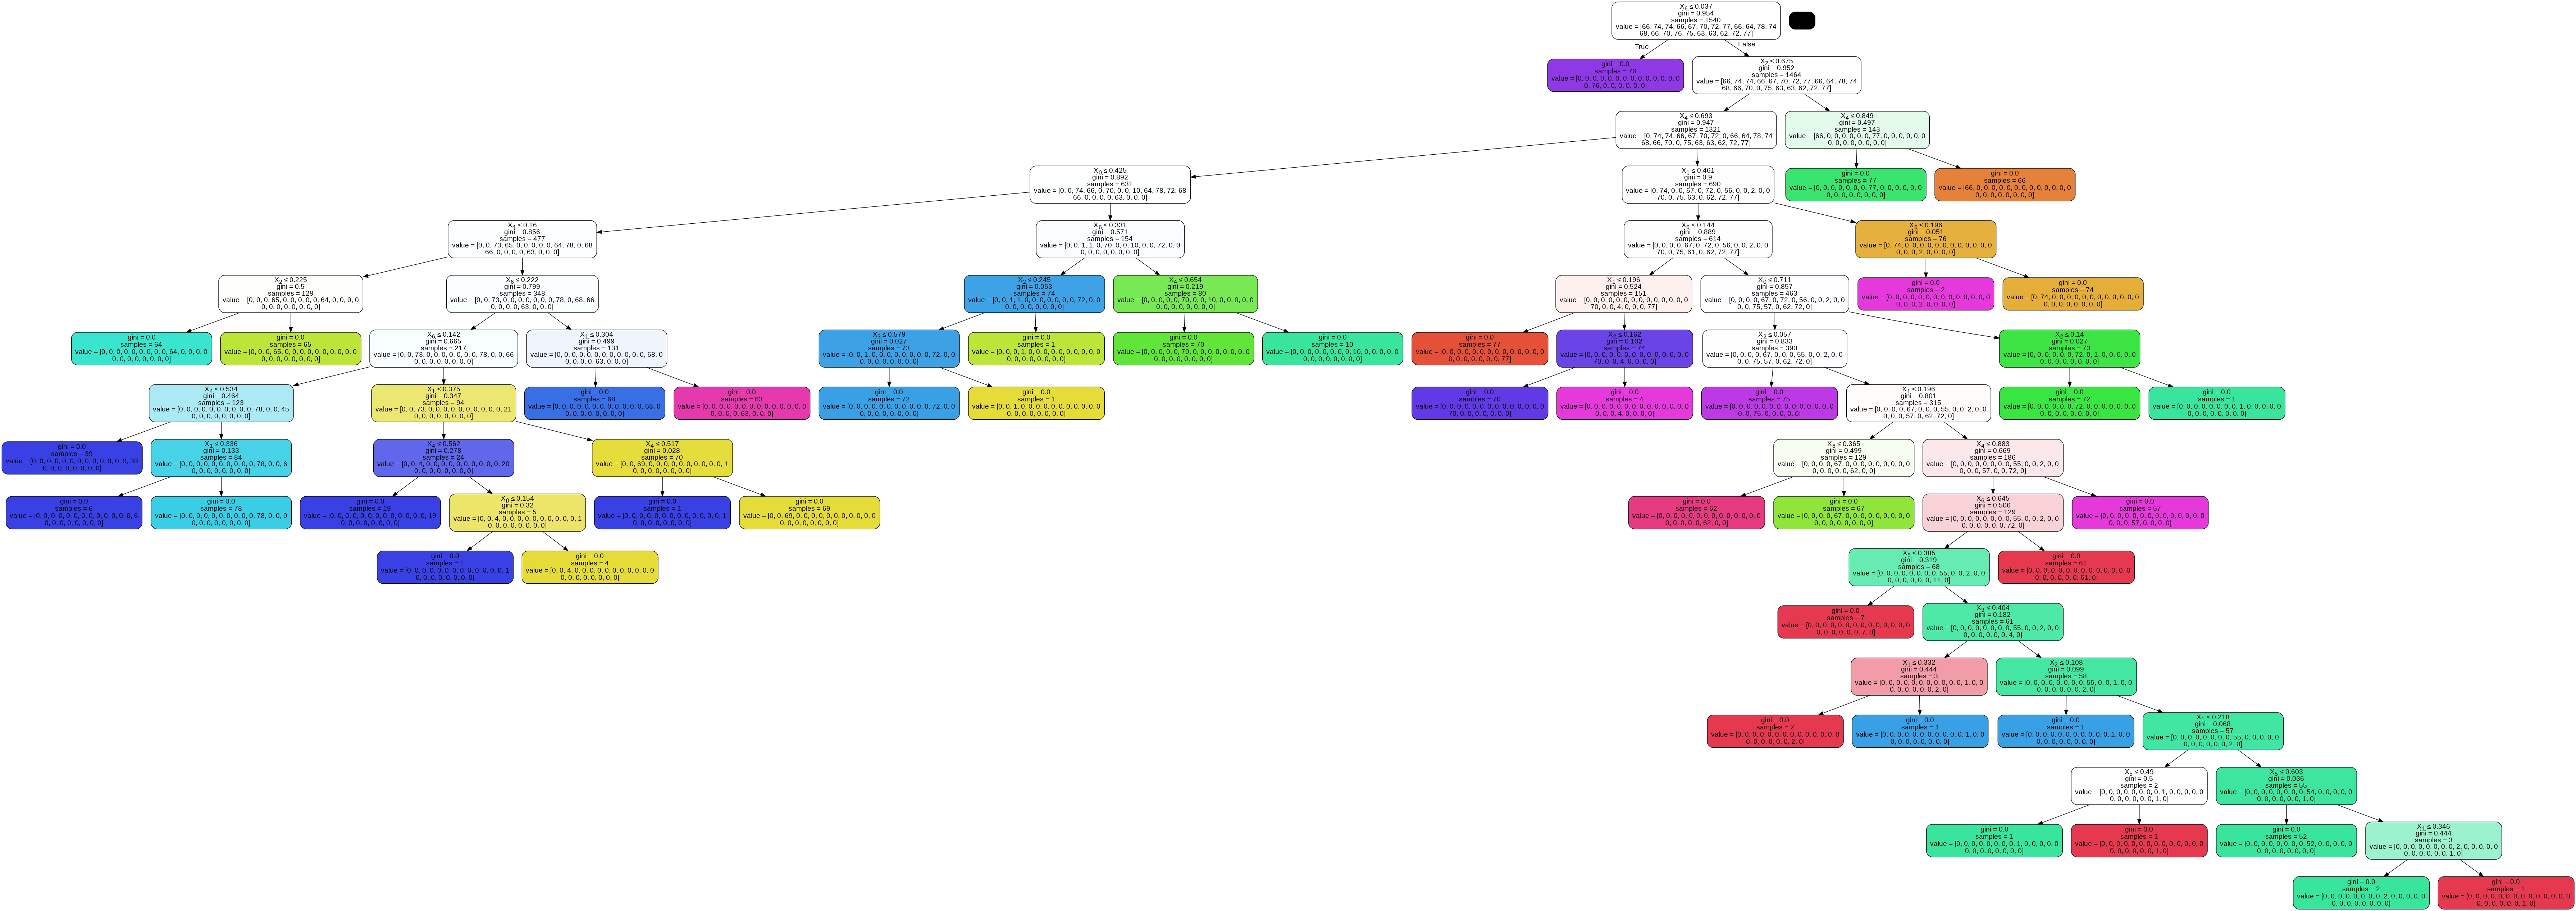

In [28]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
f1_dt = f1_score(y_test, y_pred_dt,average='micro')*100

print("F1 score for Decision Tree is ",f1_dt)

F1 score for Decision Tree is  98.63636363636363


### **K nearest neighbours Algorithm**

knn score for k = 1 : 97.27272727272728 
knn score for k = 2 : 96.96969696969697 
knn score for k = 3 : 97.57575757575758 
knn score for k = 4 : 96.81818181818181 
knn score for k = 5 : 97.42424242424242 
knn score for k = 6 : 96.21212121212122 
knn score for k = 7 : 96.51515151515152 
knn score for k = 8 : 96.06060606060606 
knn score for k = 9 : 96.51515151515152 
knn score for k = 10 : 96.06060606060606 


(96.0, 99.0)

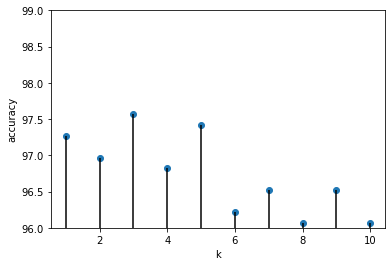

In [30]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    sc = knn.score(x_test, y_test)*100
    scores.append(sc)
    print("knn score for k = {} : {} ".format(k,sc))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores)
plt.ylim(96,99)

Here we can see that k=3 is the optimum value of k to achieve maximum accuracy.

In [31]:
knn = KNeighborsClassifier(n_neighbors = 3 )
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

acc_knn = metrics.accuracy_score(y_test, y_pred_knn)*100

print("KNN Accuracy is: ", acc_knn)
print(classification_report(y_test,y_pred_knn))

KNN Accuracy is:  97.57575757575758
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.93      0.96      0.94        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.81      1.00      0.89        34
 kidneybeans       0.95      1.00      0.97        36
      lentil       0.85      1.00      0.92        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.91      0.95        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00  

In [32]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train)*100)
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test)*100)

knn_train_accuracy =  99.15584415584415
knn_test_accuracy =  97.57575757575758


In [33]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',score*100)

Cross validation score:  [96.81818182 98.40909091 98.40909091 98.63636364 98.18181818]


In [34]:
f1_knn = f1_score(y_test, y_pred_knn,average='micro')*100

print("F1 score for KNN is ",f1_knn)

F1 score for KNN is  97.57575757575758


### **Random Forest Classifier**

In [35]:
RF = RandomForestClassifier(random_state=42)
RF.fit(x_train,y_train)

y_pred_rf = RF.predict(x_test)

acc_rf = metrics.accuracy_score(y_test, y_pred_rf)*100

print("Random Forest Accuracy is: ", acc_rf)

print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.85      1.00      0.92        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00   

In [36]:
f1_rf = f1_score(y_test, y_pred_rf,average='micro')*100

print("F1 score for Random Forest is ",f1_rf)

F1 score for Random Forest is  99.0909090909091


## **Step 8 : Evaluating the model performance**

### **Evaluation Parameter 1 : Accuracy**

In [37]:
accuracies = []
models = []

accuracies.append(acc_nb)
models.append("Naive Bayes")

accuracies.append(acc_knn)
models.append("K nearest neighbours")

accuracies.append(acc_dt)
models.append("Decision Tree ")

accuracies.append(acc_rf)
models.append("Random Forest ")




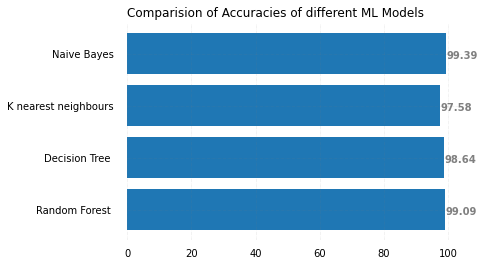

In [38]:
# Figure Size
fig, ax = plt.subplots(figsize =(6, 4))
 
# Horizontal Bar Plot
ax.barh(models, accuracies)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Comparision of Accuracies of different ML Models',
             loc ='left', )
 
# Show Plot
plt.show()

### **Evaluation Parameter 2 : F1 score**

In [41]:
f1_scores = []

f1_scores.append(f1_nb)
f1_scores.append(f1_knn)
f1_scores.append(f1_dt)
f1_scores.append(f1_rf)


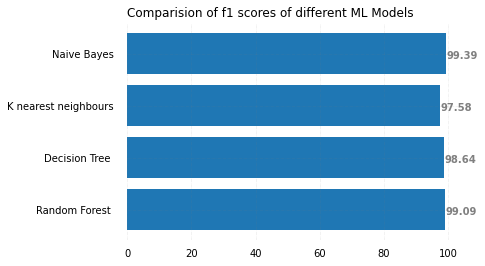

In [42]:
# Figure Size
fig, ax = plt.subplots(figsize =(6, 4))
 
# Horizontal Bar Plot
ax.barh(models,f1_scores)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Comparision of f1 scores of different ML Models',
             loc ='left', )
 
# Show Plot
plt.show()